# Coursera Capstone Project - Car Severity Prediction

### Importing libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as plt

import warnings
warnings.filterwarnings('ignore')

### Importing the Data - Provided by Coursera

In [47]:
df = pd.read_csv('Data.csv')
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Exploratory Data Analysis

In [3]:
df.shape

(194673, 38)

In [4]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

### Dropping Unrelated Columns

In [48]:
df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT','INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'   ], axis=1, inplace=True)

### EDA for Shortened Dataset 

In [49]:
df.head()

,SEVERITYCODE,X,Y,LOCATION,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,-122.323148,47.703140,5TH AVE NE AND NE 103RD ST,2,Overcast,Wet,Daylight
1,1,-122.347294,47.647172,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,Raining,Wet,Dark - Street Lights On
2,1,-122.334540,47.607871,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,3,Overcast,Dry,Daylight
3,1,-122.334803,47.604803,2ND AVE BETWEEN MARION ST AND MADISON ST,3,Clear,Dry,Daylight
4,2,-122.306426,47.545739,SWIFT AVE S AND SWIFT AV OFF RP,2,Raining,Wet,Daylight


In [50]:
df.describe()

,SEVERITYCODE,X,Y,VEHCOUNT
count,194673.000000,189339.000000,189339.000000,194673.000000
mean,1.298901,-122.330518,47.619543,1.920780
std,0.457778,0.029976,0.056157,0.631047
min,1.000000,-122.419091,47.495573,0.000000
25%,1.000000,-122.348673,47.575956,2.000000
50%,1.000000,-122.330224,47.615369,2.000000
75%,2.000000,-122.311937,47.663664,2.000000
max,2.000000,-122.238949,47.734142,12.000000


In [51]:
df.shape

(194673, 8)

In [52]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'LOCATION', 'VEHCOUNT', 'WEATHER', 'ROADCOND',
       'LIGHTCOND'],
      dtype='object')

In [53]:
df.dtypes

SEVERITYCODE      int64
X               float64
Y               float64
LOCATION         object
VEHCOUNT          int64
WEATHER          object
ROADCOND         object
LIGHTCOND        object
dtype: object

In [54]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [55]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [56]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [57]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

### ReSampling 

In [58]:
from sklearn.utils import resample

df_maj = df[df.SEVERITYCODE==1]
df_min = df[df.SEVERITYCODE==2]

df_sample = resample(df_maj, replace=False, n_samples=58188, random_state=123)
df = pd.concat([df_sample, df_min])

df['SEVERITYCODE'].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

### Encoding

In [59]:
df['WEATHER'] = df['WEATHER'].astype('category')
df['ROADCOND'] = df['ROADCOND'].astype('category')
df['LIGHTCOND'] = df['LIGHTCOND'].astype('category')

df.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
LOCATION          object
VEHCOUNT           int64
WEATHER         category
ROADCOND        category
LIGHTCOND       category
dtype: object

In [66]:
df['WEATHER_C'] = df['WEATHER'].cat.codes
df['ROADCOND_C'] = df['ROADCOND'].cat.codes
df['LIGHTCOND_C'] = df['LIGHTCOND'].cat.codes

Feature = df[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'WEATHER_C', 'ROADCOND_C', 'LIGHTCOND_C']]
X = Feature
X = np.asarray(Feature[['WEATHER_C','ROADCOND_C','LIGHTCOND_C']])
X[0:]

array([[ 6,  8,  2],
       [ 1,  0,  5],
       [10,  7,  8],
       ...,
       [ 1,  0,  5],
       [ 1,  0,  5],
       [ 1,  0,  6]], dtype=int8)

In [67]:
y = df['SEVERITYCODE'].values
y[0:]

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

### Modelling

### Normalizing Data

In [68]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:]

array([[ 1.15236718,  1.52797946, -1.21648407],
       [-0.67488   , -0.67084969,  0.42978835],
       [ 2.61416492,  1.25312582,  2.07606076],
       ...,
       [-0.67488   , -0.67084969,  0.42978835],
       [-0.67488   , -0.67084969,  0.42978835],
       [-0.67488   , -0.67084969,  0.97854582]])

### Splitting Data

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('Test set shape: ', X_test.shape, y_test.shape)
print('Training set shape: ', X_train.shape, y_train.shape)

Test set shape:  (34913, 3) (34913,)
Training set shape:  (81463, 3) (81463,)


### KNN Model 

In [70]:
from sklearn.neighbors import KNeighborsClassifier
k = 24
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh_pred = neigh.predict(X_test)
neigh_pred[0:]

array([1, 1, 1, ..., 1, 2, 2], dtype=int64)

In [82]:
from sklearn.metrics import f1_score, jaccard_similarity_score, log_loss
print("F1-Score of KNN is : ", f1_score(y_test, neigh_pred, average='macro'))
print("Jaccard Score of KNN is : ", jaccard_similarity_score(y_test, neigh_pred))

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn' (C:\Users\Khushi Thakkar\Anaconda3\lib\site-packages\sklearn\__init__.py)

### Decision Tree 

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
dt.fit(X_train, y_train)
pt = dt.predict(X_test)
pt[0:]

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [73]:
print("F1-Score of Decision Tree is : ", f1_score(y_test, pt, average='macro'))
print("Jaccard Score of Decision Tree is : ", jaccard_similarity_score(y_test, pt))

F1-Score of Decision Tree is :  0.4950521410627534


NameError: name 'jaccard_similarity_score' is not defined

### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LRpred = LR.predict(X_test)
LRprob = LR.predict_proba(X_test)
LRpred[0:]

array([2, 2, 2, ..., 1, 2, 2], dtype=int64)

In [75]:
print("F1-Score of Logistic Regression is : ", f1_score(y_test, LRpred, average='macro'))
print("Jaccard Score of Logistic Regression is : ", jaccard_similarity_score(y_test, LRpred))
print("LogLoss of Logistic Regression is : ", log_loss(y_test, LRprob))

F1-Score of Logistic Regression is :  0.511730658380482


NameError: name 'jaccard_similarity_score' is not defined

### Confusion Matrix


In [76]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 6201 11315]
 [ 5235 12162]]


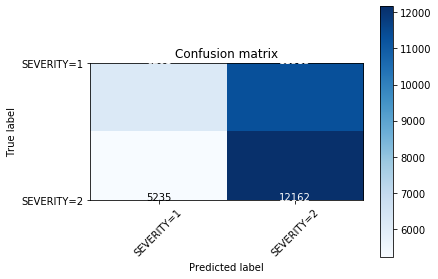

In [77]:
cnf_matrix = confusion_matrix(y_test, LRpred, labels=[1,2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERITY=1','SEVERITY=2'],normalize= False,  title='Confusion matrix')

In [78]:
print (classification_report(y_test, LRpred))

              precision    recall  f1-score   support

           1       0.54      0.35      0.43     17516
           2       0.52      0.70      0.60     17397

    accuracy                           0.53     34913
   macro avg       0.53      0.53      0.51     34913
weighted avg       0.53      0.53      0.51     34913

